<h1>
    Jupyter, Pandas, Numpy, Matplotlib
</h1>    
For our first Jupyter demonstration, we are going to load some of the most common python libraries.  These include:
<ul>
<li><b>pandas</b>, which provides a rich set of features for data access and manipulation
<li><b>numpy</b>, which provides most of the numerical functionality of matlab, 
<li><b>matplotlib</b>, which provides most of the graphical functionality of matlab, 
</ul>
We will only scratch the surface of these libraries in this class.

In [1]:
# standard import statements
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# jupyter-specific display instructions
%config InlineBackend.figure_format = 'retina'

# my personal defaults
mpl.rcParams['figure.figsize'] = (5.5, 3.5)
mpl.rcParams['font.size'] = 10
mpl.rcParams['lines.linewidth'] = 3

## Pandas

Next, we will use pandas to read the excel file containing our data.  The call to pd.read_excel returns a Pandas dataframe.  The call to .head() shows us the overall structure of the dataframe, including the names of the columns, which we see are called 'x' and 'y'.

In [5]:
excel_file = 'data/demo-intro-jupyter-pandas.xlsx'
mydata = pd.read_excel(excel_file)
mydata.head()

,x,y
0,0.0,2.415937
1,0.1,2.351614
2,0.2,2.662494
3,0.3,2.632878
4,0.4,2.711628


If you compare this display to the actual Excel file, you will notice two important things:

* pandas treats the first row of the spreadsheet as column labels
* pandas adds a unique *index* value to each row of data
  
Pandas makes it easy to access individual columns from the dataframe, using something called *dictionary notation*:

In [6]:
display( mydata["x"].head() )
display( mydata["y"].head() )

0    0.0
1    0.1
2    0.2
3    0.3
4    0.4
Name: x, dtype: float64

0    2.415937
1    2.351614
2    2.662494
3    2.632878
4    2.711628
Name: y, dtype: float64

Note that the result of this access returns another Pandas object (Pandas calls this a *Series*) which preserves the index values of each row from the original dataframe.

## Numpy

A pandas series is basically just an array with extra index information.  And you can often operate on these objects with standard mathematical operations.  Unfortunately, in rare cases, these objects behave unexpectedly to a mathematician.  So just to be safe, I usually also convert the independent and dependent data values to concisely-named **numpy arrays**, as follows. 

In [7]:
# extract data into numpy arrays
datax = np.array(mydata['x'])
datay = np.array(mydata['y'])

display(datax)
display(datay)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

array([2.41593671, 2.35161369, 2.66249387, 2.63287841, 2.71162836,
       2.86789692, 2.89206498, 2.89306003, 2.83878691, 2.87072771,
       3.05745808, 3.16189675, 3.03005078, 2.99024219, 3.36001514,
       3.44572129, 3.10115374, 3.41626018, 3.24997336, 3.49779061,
       3.41955536, 3.64306545, 3.62081801, 3.7019524 , 3.58496674,
       3.5915373 , 3.77519831, 3.9695517 , 4.08677498, 3.83203099,
       3.87570852, 4.08091503, 4.18371979, 4.32784336, 4.16216505,
       4.27233941, 4.46805519, 4.50073014, 4.45346204, 4.4107544 ,
       4.32302429, 4.62494829, 4.44902494, 4.60779368, 4.86577576,
       4.90239859, 4.90759831, 4.99144646, 5.0412713 , 5.03260449,
       4.90118846])

We see that the indices are gone, leaving just the lists of numbers.  And every mathematical function within the numpy library can operate on such lists without any risk of failure.

## Matplotlib

The third main library allows us to fairly easily create nice-looking plots.  A typical snippet of code might look like the following:

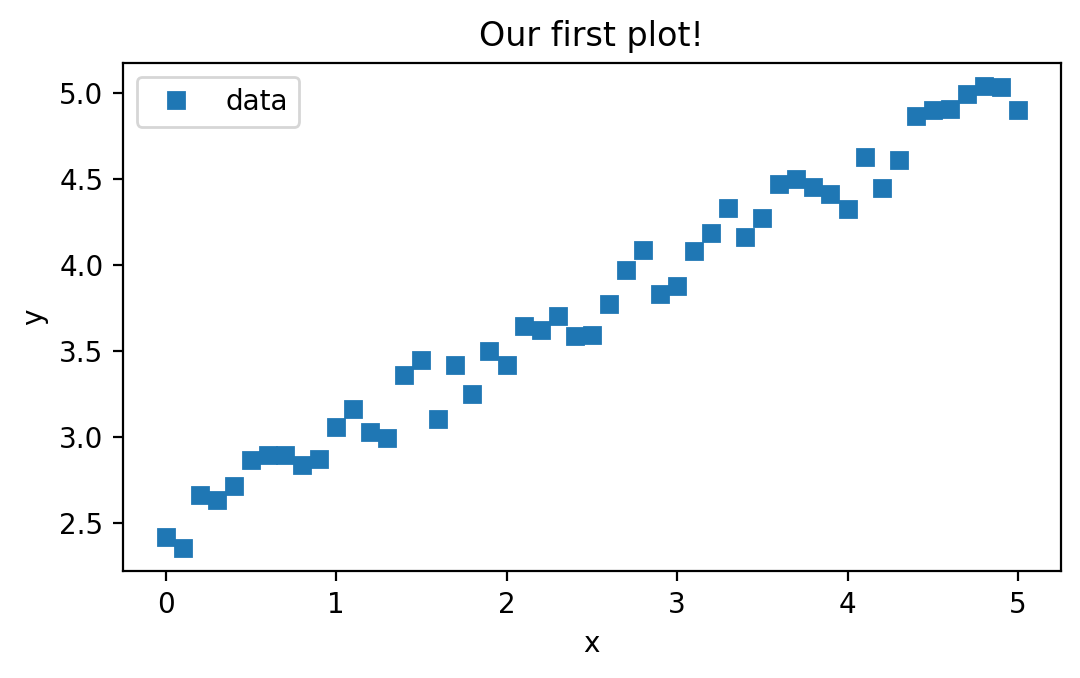

In [9]:
fig, ax = plt.subplots()
ax.plot(datax, datay, 's', label='data')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_title('Our first plot!')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

Note that a lot of the code we have written here changes the *look* of the graph, i.e.:

* setting the shape of the figure
* setting the line style and label
* setting the axis labels
* setting a title
* creating a legend

If you have experience producing graphs in Excel or Matlab, you might be used to doing these things *after* making the graph itself, possibly using 'point-and-click' interfaces provided by those environments.  However, it is *much better practice* to do these things in the code, because if you decide that you want or need to change the graph, you simply modify the code as needed, and then all of the desired properties will automatically be re-applied.

## Use in Modeling

At this point we have the tools to begin sketching out an extremely common task in this class -- comparing a model to data. 

The first thing we need to do is create a function that might describe the data.  For this data, it looks like a simple linear function would be appropriate, and so I'll create a linear function:

In [11]:
def linear_model(x, a, b):
    return a + b * x


Note that I did not specify the values of the parameters $a$ and $b$ in the definition of the model.  That would have produced a function that only applied to this particular data set.  Instead, I've created a model encompassing a *family* of functions distinguished by different values $a$ and $b$.

Next, in a *separate step*, I will guess values for the parameters $a$ and $b$.  For this data set, $a$ appears to be about 2.5, whereas $b$ appears to be about 0.5.  With these values, I use the function I created to generate *predicted values* of $y$ associated with the guessed parameters:

In [13]:
aguess = 2.5
bguess = 0.5
modely = linear_model(datax, aguess, bguess)

Finally, we will create a plot of both the actual data (using **discrete points**), and the model that fits the data (using a **solid line**).  This code looks nearly identical to the code for the previous plot, but it contains an extra line of code (for the extra line on the plot).

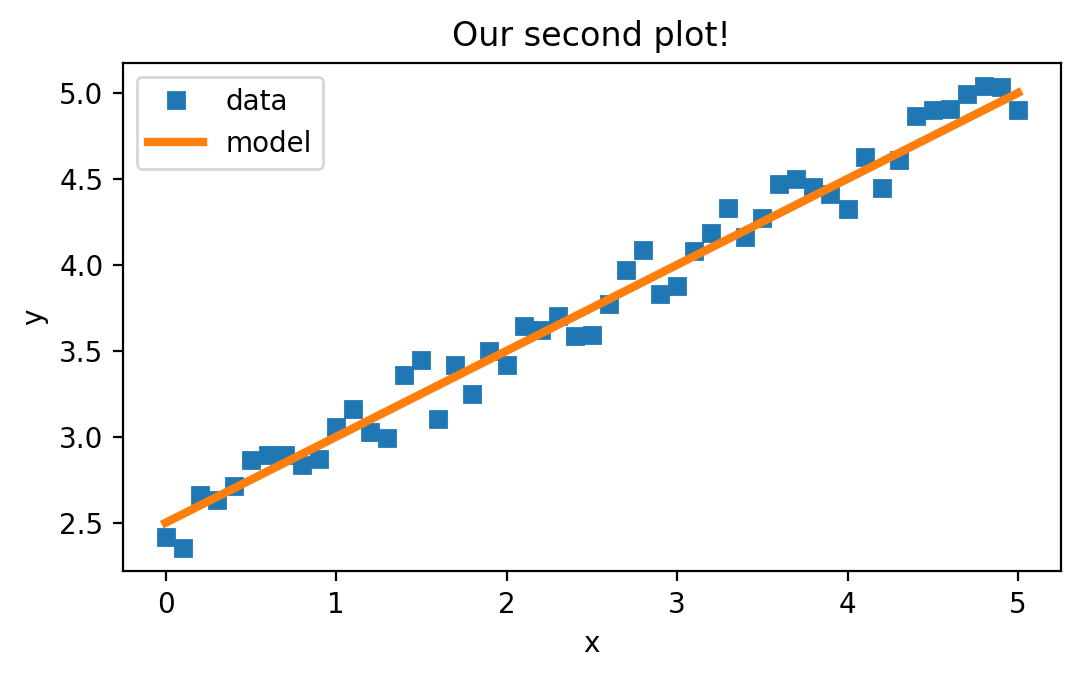

In [14]:
fig, ax = plt.subplots()
ax.plot(datax, datay, 's', label='data')
ax.plot(datax, modely, '-', label='model')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Our second plot!')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

### Note:  Saving Graphics for External use

Often, you want to export some of your graphics (typically the most important ones) so that you can included them in a separate document (you will do this on all of your homeworks).  For this, we use **savefig()** command, which creates files in the same directory as the jupyter notebook.  For a really professional look in a document, you should use the PDF format, whereas for the web, you can typically use the PNG format (never use JPG for "line-type" figures such as this one -- the compression algorithm at the heart of the JPG format creates blocky artifacts around text and sharp lines).

In [16]:
# optional -- save for a paper
fig.savefig('save/intro-jupyter-pandas.pdf')

# optional -- save for the web
fig.savefig('save/intro-jupyter-pandas.png')